## **타이타닉 생존자 예측**

1. Data Load
→ 대회에서 제공된 학습용(train), 테스트용(test) 데이터를 불러오고 구조를 확인한다.

2. EDA and Data Visualization
→ 데이터의 분포, 결측치, 이상치 등을 시각화하여 특징과 패턴을 파악한다.

3. Data Preprocessing
→ 결측값 처리, 인코딩, 스케일링 등 모델 학습에 적합하도록 데이터를 정제한다.

4. Modeling
→ 머신러닝 또는 딥러닝 모델을 정의하고 학습시켜 예측 모델을 생성한다.

5. Model Evaluation
→ K-Fold 교차 검증이나 평가 지표를 사용해 모델의 성능과 일반화 능력을 검증한다.

6. Submission
→ 테스트 데이터에 대해 예측 결과를 생성하여 제출 형식에 맞게 저장한다.

## 1. Data Load 

Import Library

In [1]:
import pandas as pd
import numpy as np

Data Read

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

Data Information

In [3]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Random Seed Setting 

In [8]:
import random
np.random.seed(1234) # numpy의 난수 고정
random.seed(1234) # random 모듈의 난수 고정

## 2. EDA and Data Visualization 

EDA (Exploratory Data Analysis)

In [9]:
# Display rows and columns
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [11]:
# Preview data contents
# Adjust maximum and minimum output limits
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [12]:
# Output top 10 rows
train_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [14]:
# Check data type
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# Check data statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
# Check category variables
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
train_df["Embarked"].value_counts() #승선항구

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
train_df["Cabin"].value_counts() # 선실번호

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [21]:
# Check missing value
train_df.isnull().sum() #선실번호, 나이 결측 많음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data Visualization 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Style setting
plt.style.use("ggplot")

- Visualization of survived rate about Embarked

In [25]:
# Extract rows and columns
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [27]:
# Exclude missing value
train_df[["Embarked", "Survived", "PassengerId"]].dropna()
#결측값이 하나라도 있는 행을 제거

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [28]:
# Grouping
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()
# Embarked, Survived, PassengerID 열 중 하나라도 결측값 있는 행 제거
# Embarked와 Survived를 기준으로 그룹 나누기
# .count는 각 그룹마다 passengerID의 개수 세기

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [29]:
# Horizontal transformation
# 피벗 테이블 형태로 그룹화한 데이터 변형
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

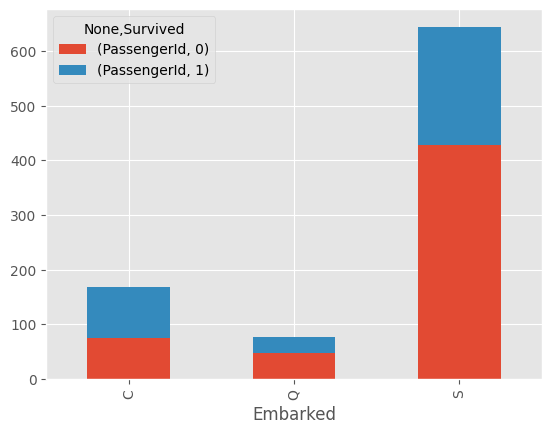

In [30]:
# Bar graph visualization
embarked_df.plot.bar(stacked=True)

In [31]:
# Add survived rate
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

- Visualization of survived rate about Sex and Pclass

<Axes: xlabel='Sex'>

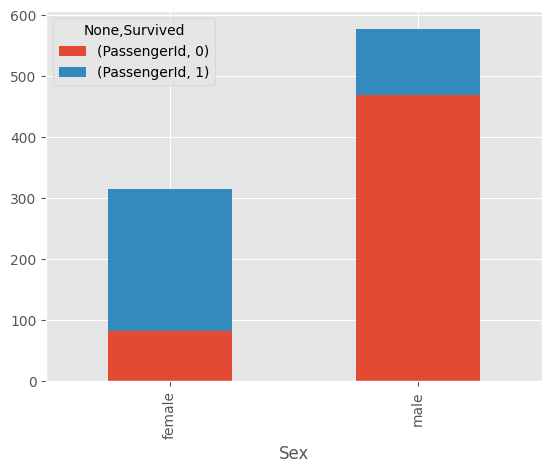

In [33]:
# Sex visualization
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

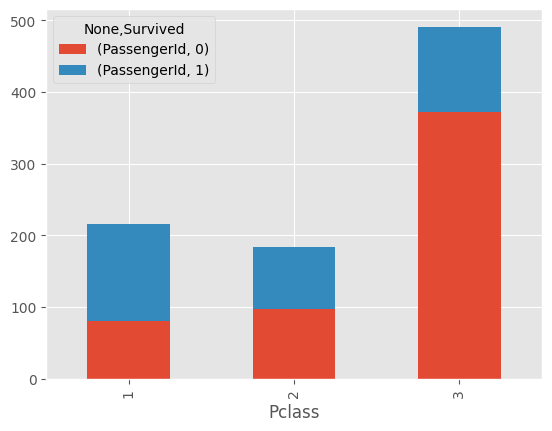

In [34]:
# Pclass visualization
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

- Visualization of survived rate about Age

<Axes: xlabel='Age'>

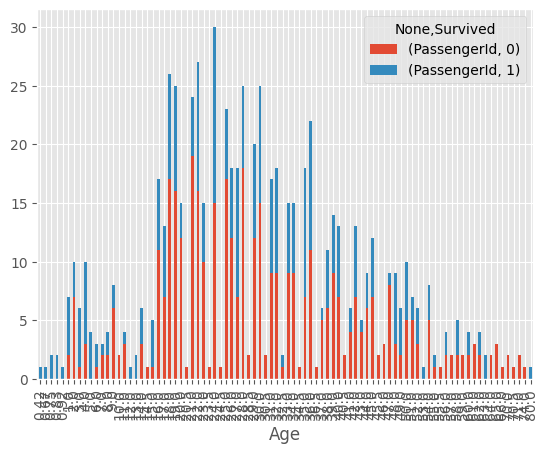

In [35]:
# Age visualization
age_df = train_df[["Age", "Survived", "PassengerId"]].dropna().groupby(["Age", "Survived"]).count().unstack()
age_df.plot.bar(stacked=True)

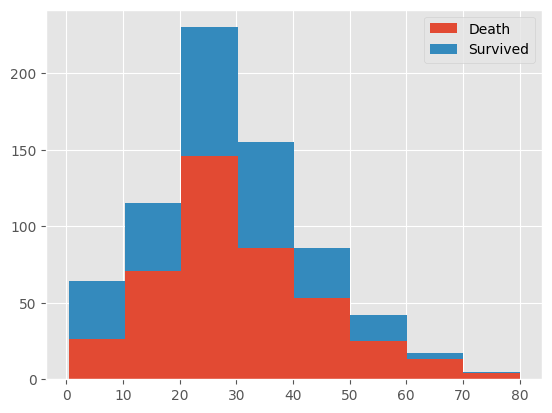

In [36]:
# Age histogram visualization
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

- Dummy variable for categorical variables

In [38]:
# Dummy variable
# 범주형 데이터를 0과 1로 이루어진 수치형 변수로 변환한 것
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


- Heatmap visualization

In [39]:
# Correlation matrix
train_corr = train_df_corr.select_dtypes(include=["number", "bool"]).corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

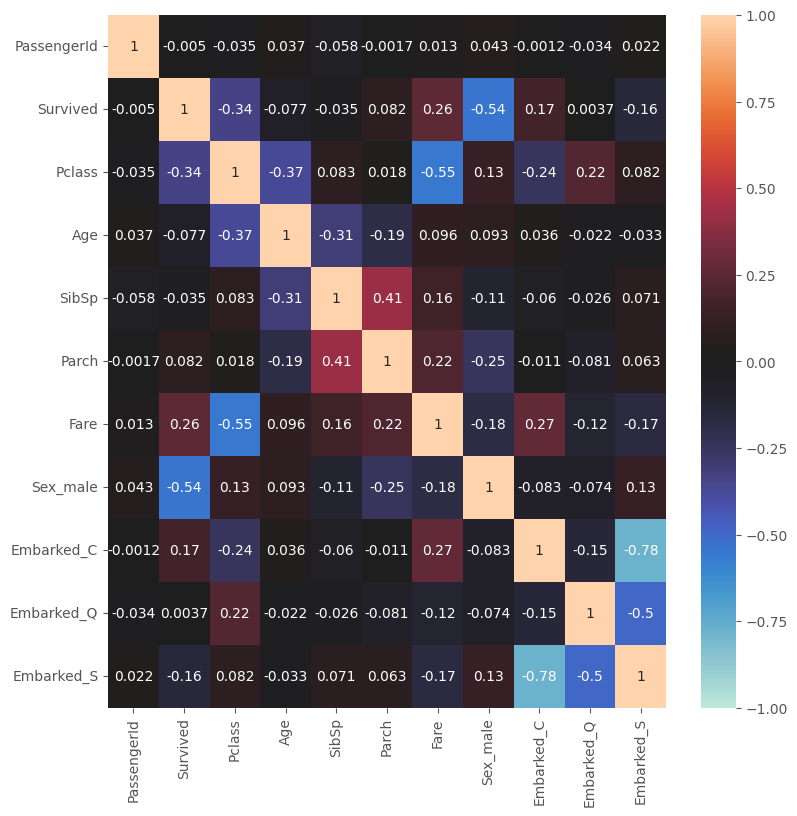

In [40]:
# Heatmap visualization
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

## 3. Data Preprocessing

Data Preprocessing and Feature Value Generation

- train data와 test data를 통합하여 통계 정보 획득

In [42]:
# Merge data
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
# Check missing value
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
# Fill missing value
# Pclass(등급)별로 Fare(요금)의 평균값을 계산하여 결측값을 채우기 위한 기준 데이터 생성
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

# Rename column
# 계산된 평균 요금 컬럼 이름을 'Fare_mean'으로 바꿔서 의미를 명확하게 함
Fare_mean.columns = ["Pclass", "Fare_mean"]

Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [48]:
# Add average Fare by Pclass
# Pclass별 평균 요금(Fare_mean)을 원본 데이터프레임(all_df)에 병합
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

# Fill missing Fare
# Fare 값이 결측인 승객에게, 같은 Pclass의 평균 요금(Fare_mean)으로 대체
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

# Drop temporary column
# 임시로 사용한 Fare_mean 열을 제거하여 데이터 정리
all_df = all_df.drop("Fare_mean", axis=1)

- Name data의 호칭에 대한 분석

In [49]:
# Name information
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [51]:
# Add variable
# Name 열을 쉼표(,)와 마침표(.) 기준으로 최대 2번까지 분할
# → 성, 호칭(Mr/Mrs 등), 이름 부분으로 나눔
name_df = all_df["Name"].str.split("[,.]", n = 2, expand=True)

# Rename column
# 나눠진 3개의 열에 의미 있는 이름 부여: 성, 호칭, 이름
name_df.columns = ["family_name", "honorific", "name"]

# 결과 출력: 성, 호칭, 이름으로 나눈 DataFrame 확인
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [53]:
# Strip spaces from each part
# 불필요한 공백 제거
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

- 호칭별 인원수 및 연령 분포

In [54]:
# Number of honorific
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [55]:
# merge data
all_df = pd.concat([all_df, name_df], axis=1)

all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

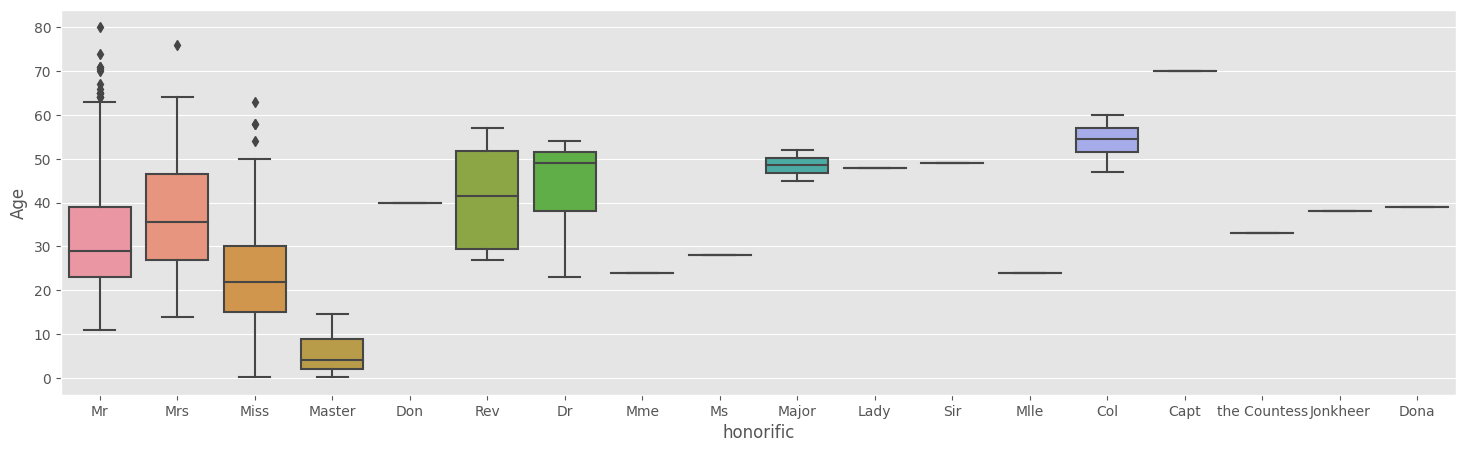

In [56]:
# Data distribution
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

- Visualization of survived rate about honorific

In [67]:
train_df = pd.concat([train_df.reset_index(drop=True), name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), name_df[len(train_df):].reset_index(drop=True)], axis=1)

In [68]:
# Survived rate of honorific
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

ValueError: Grouper for 'honorific' not 1-dimensional

- 연령별 missing value 보완

In [69]:
# Calculate average
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()

# Rename column
honorific_age_mean.columns = ["honorific", "honorific_Age"]

# Merge data
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")

# Fill missing value
all_df.loc[all_df["Age"].isnull(), "Age"] = all_df["honorific_Age"]

# Drop temporary average column
all_df = all_df.drop(["honorific_Age"], axis=1)

- Parch, SibSp and alone Variable Processing

In [70]:
# Create family num variable
# Parch: 부모/자녀 수, SibSp: 형제/자매/배우자 수 → 이 둘을 합쳐서 가족 수 변수 생성
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [71]:
# Create alone variable
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"] = all_df["alone"].fillna(0)

- 불필요한 Variable 삭제

In [72]:
# Drop variable
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


- 카테고리 변수 수치로 변환 

In [74]:
# Create categories variable
# 데이터프레임에서 dtype이 'object'인 열들만 선택 (보통 범주형 변수)
categories = all_df.columns[all_df.dtypes=="object"]

# 선택된 범주형 변수 목록 출력
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


- Mr, Miss, Mrs, Master 이외에는 other로 통합

In [75]:
# Integrate with other
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mr") | (all_df["honorific"]=="Master")), "honorific"] = "other"

all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
other     231
Master     61
Name: count, dtype: int64

- Label Encoding
- sklearn의 LabelEncoder 사용
- Missiong value가 있으면 작동하지 않음

In [76]:
from sklearn.preprocessing import LabelEncoder

In [78]:
# Fill missing Embarked
# Embarked(탑승 항구) 열에서 결측값(NaN)을 "missing"이라는 문자열로 대체
all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,other,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,other,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [80]:
# LabelEnoder example for one Sex column
le = LabelEncoder()
# 'Sex' 열에 대해 LabelEncoder 학습
le = le.fit(all_df["Sex"])
# 문자열 값을 숫자로 변환하여 다시 'Sex' 열에 덮어씀
all_df["Sex"] = le.transform(all_df["Sex"])

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,C,other,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,S,other,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,S,Mr,0,1.0


In [82]:
# LabelEnoder for all object
for cat in categories: # categories: object 타입 열들의 이름 리스트
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat]) # 정수형으로 변환하여 다시 저장

all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


- Revert all data to train data and test data

In [83]:
# Train data (features)
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

# Train data (target)
train_Y = train_df["Survived"]

# Test data (features only, no labels)
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

## 4. Modeling

- LightGBM Learning

In [86]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [89]:
# Split 20% of the train data into test data
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [92]:
# Create LGB data set
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
# 학습용 데이터셋 생성 (X_train, y_train)
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
# 검증용 데이터셋 생성 (X_valid, y_valid)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [94]:
# Set hyperparameter
lgbm_params = {
    "objective":"binary", # 목적 함수: 이진 분류(binary classification)
    "random_seed":1234 # 랜덤 시드 고정 (결과 재현 가능하게 설정)
}

In [95]:
# Train Machine Learning Model
model_lgb = lgb.train(lgbm_params, # 사전에 정의한 하이퍼파라미터 딕셔너리
                      lgb_train, # 학습 데이터셋 (LightGBM 전용 Dataset 객체)
                      num_boost_round=100, # 최대 부스팅 반복 횟수 (최대 100회 트리 생성)
                      valid_sets=[lgb_eval], # 검증 데이터셋 (조기 종료 기준으로 사용됨)
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20), # 검증 손실이 20회 연속 개선되지 않으면 학습 중단
                          lgb.log_evaluation(period=10) # 10번마다 학습 로그 출력
                      ]
)

[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [96]:
# Check importance of variable
model_lgb.feature_importance()

array([ 47,  22, 264,  16,   9, 272,  42,   7,  28,   2], dtype=int32)

<Axes: >

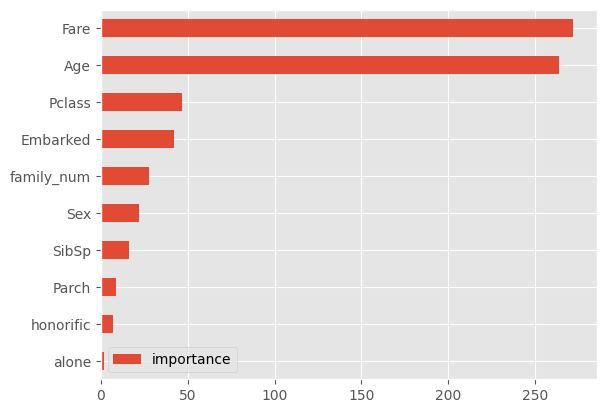

In [98]:
# Importance visualization 
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

## 5. Model Evaluation

- hold out 방식

In [101]:
# Apply the model to eval data
# X_valid: 검증용 입력 데이터
# model_lgb.best_iteration: 조기 종료 시점까지 학습된 최적 트리 수만큼 예측
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
# Calculating initial accuracy
accuracy_score(y_valid, np.round(y_pred))

0.8212290502793296

- hyperparameter 변경으로 model optimization

In [106]:
# Hyperparameter optimization
lgbm_params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "random_seed": 1234
}

In [108]:
# Retrain
# 훈련용 Dataset 재생성 (범주형 변수 지정 포함)
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
# 검증용 Dataset도 재생성하며, reference를 훈련 데이터로 설정
# → 메타 정보(예: 범주형 변수 처리 등)를 공유함
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [109]:
# Retrain Machine Learning Model
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20),
                          lgb.log_evaluation(period=10)
                      ]
)

[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [110]:
# Recheck importance of variable
model_lgb.feature_importance()

array([ 92,  43, 546,  34,  26, 570,  80,  13,  56,   6], dtype=int32)

<Axes: >

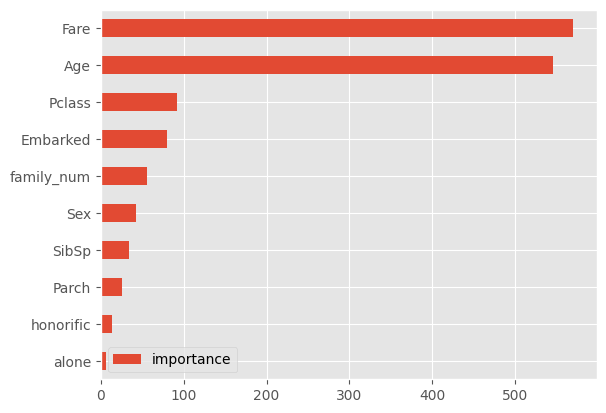

In [111]:
# Recheck importance visualization 
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

In [112]:
# Apply the model to eval data
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [113]:
# Calculating accuracy
accuracy_score(y_valid, np.round(y_pred))

0.8212290502793296

- Cross Validation 시행

In [114]:
# Cross validation
folds = 3 # 3-fold 교차검증 진행
kf = KFold(n_splits=folds)

In [115]:
# Save accuracy
accuracy_list = []

# Cross validation learning
models = []
for train_index, val_index in kf.split(train_X): # train_X를 folds 개수만큼 분할
    # 각 fold에 대해 학습/검증 데이터 분할
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    # LightGBM용 Dataset 생성
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

     # 모델 학습 (조기 종료 및 로그 출력 포함)
    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_eval],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=10)
        ]
    )

    # 예측 -> 확률값
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    acc = accuracy_score(y_valid, np.round(y_pred))

    # Fold별 정확도 출력 및 저장
    print("Fold accuracy:", acc)
    accuracy_list.append(acc)

    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [116]:
# Average accuracy output
mean_accuracy = np.mean(accuracy_list)
print("Average Cross-Validation Accuracy:", mean_accuracy)

Average Cross-Validation Accuracy: 0.8350168350168351


- mean과 결과 구하기

In [117]:
# Save prediction result
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [119]:
# Calculate mean
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [121]:
# Convert to 0 or 1
# 예측 확률이 0.5보다 크면 1 (생존), 아니면 0 (사망)으로 변환
preds_int = (preds_mean > 0.5).astype(int)

## 6. Submission

- submission file 생성

In [122]:
# Create submission file
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [123]:
# Save to csv file
submission.to_csv("titanic_submit01.csv", index=False)